# Clustering With K-Means

Clustering simply means the assigning of data points to groups based upon how similar the points are to each other. A clustering algorithm makes "birds of a feather flock together," so to speak.

Cluster Labels as a Feature¶
Applied to a single real-valued feature, clustering acts like a traditional "binning" or "discretization" transform. On multiple features, it's like "multi-dimensional binning" (sometimes called vector quantization).

Let's review how the k-means algorithm learns the clusters and what that means for feature engineering. We'll focus on three parameters from scikit-learn's implementation: n_clusters, max_iter, and n_init.

## Example - California Housing

As spatial features, California Housing's 'Latitude' and 'Longitude' make natural candidates for k-means clustering. In this example we'll cluster these with 'MedInc' (median income) to create economic segments in different regions of California.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("../../dataset/housing.csv.zip")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Since k-means clustering is sensitive to scale, it can be a good idea rescale or normalize data with extreme values.

Our features are already roughly on the same scale, so we'll leave them as-is.

In [4]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,1
1,8.3014,37.86,-122.22,1
2,7.2574,37.85,-122.24,1
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,5


Now let's look at a couple plots to see how effective this was.
 
First, a scatter plot that shows the geographic distribution of the clusters.
 
It seems like the algorithm has created separate segments for higher-income areas on the coasts.

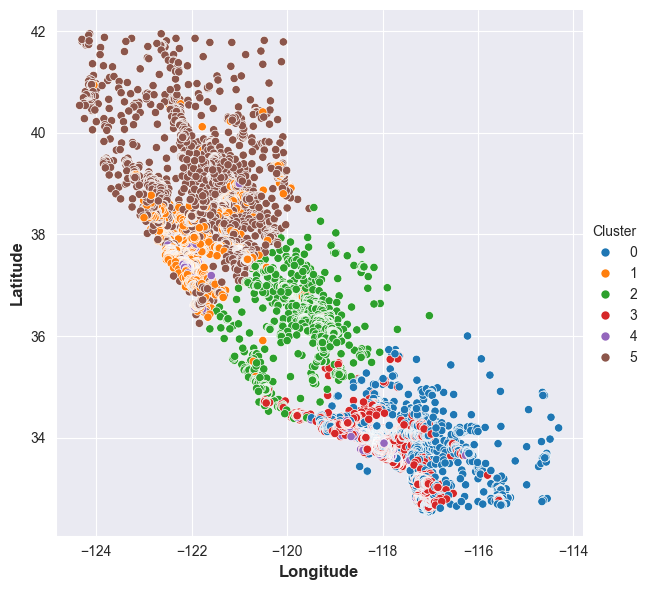

In [5]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
)

The target in this dataset is MedHouseVal (median house value). 

These box-plots show the distribution of the target within each cluster. 

If the clustering is informative, these distributions should, for the most part, separate across MedHouseVal, which is indeed what we see.

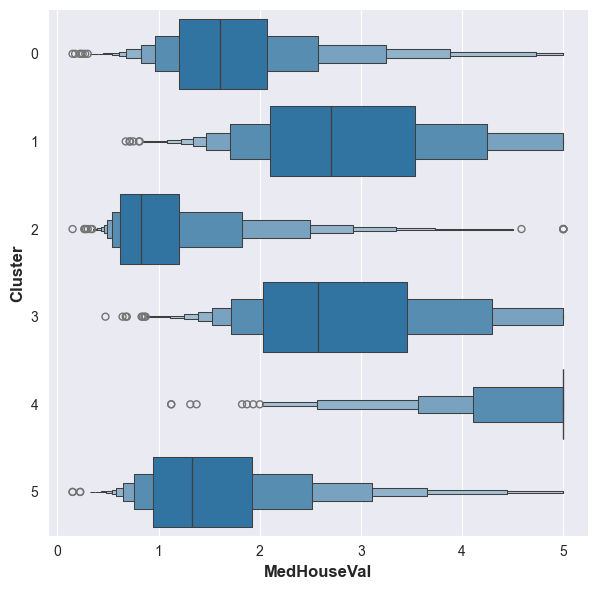

In [6]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);